# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 2 [here](https://www.nltk.org/book/ch02.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
    1. Accessing Text Corpora
    2. Conditional Frequency Distributions
    3. More Python: Reusing Code
    4. Lexical Resources
    5. [WordNet](#WordNet)
        1. [Senses and Synonyms](#SensesSyns)
        2. [The WordNet Hierarchy](#Hierarchy)
        3. [More Lexical Relations](#LexicalRelations)
        4. [Semantic Similarity](#Semantics)

**Install**, **import** and **download NLTK**. <br>

*Uncomment lines 2 and 5 if you haven't installed and downloaded NLTK yet.*

In [1]:
# install nltk
#!pip install nltk

# load nltk
import nltk

# download nltk
#nltk.download()

<a name="WordNet"></a>
## 2.5. WordNet
1. [Senses and Synonyms](#SensesSyns)
2. [The WordNet Hierarchy](#Hierarchy)
3. [More Lexical Relations](#LexicalRelations)
4. [Semantic Similarity](#Semantics)

`from nltk.corpus import wordnet`

WordNet is a **semantically-oriented dictionary of English**, similar to a traditional **thesaurus** but with a **richer structure**. 

NLTK includes the **English WordNet**, with **155,287 words** and **117,659 synonym sets**.

<a name="SensesSyns"></a>
### 2.5.1 Senses and Synonyms
If we replace a word in a sentence and its meaning remain the same, those words are **synonyms**, i.e. have the **same meaning**.

In [2]:
from nltk.corpus import wordnet as wn

# search for the 'sense' of a word
print(wn.synsets('motorcar'))

[Synset('car.n.01')]


The word 'motorcar' has **one possible meaning**, identified as `car.n.01`, the $1^{st}$ **noun sense** of 'car'.

The **entity** `car.n.01` is called a **synset**, **syn**onym **set**, a collection of synonymous words (or "**lemmas**").

In [4]:
# search for all the synonyms that have the same lemma
print(wn.synset('car.n.01').lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']


Each word of a **synset** can have **several meanings**, however we are interested in the **single meaning**, i.e. **lemma**, that is common to all words of the above synset.

In [6]:
# get the definition of a synset
print(wn.synset('car.n.01').definition(), "\n")

# get an example use of a synset
print(wn.synset('car.n.01').examples())

a motor vehicle with four wheels; usually propelled by an internal combustion engine 

['he needs a car to get to work']


Although definitions help humans to understand the intended meaning of a synset, **the words of the synset are often more useful for our programs**.

To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This **pairing of a synset with a word** is called a **lemma**. 

In [25]:
# get all lemmas for synset
print(wn.synset('car.n.01').lemmas(), "\n")

# look up for a particular lemma
print(wn.lemma('car.n.01.automobile'), "\n")

# get the synset corresponding to a lemma
print(wn.lemma('car.n.01.automobile').synset(), "\n")

# get the name of a lemma
print(wn.lemma('car.n.01.automobile').name())

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')] 

Lemma('car.n.01.automobile') 

Synset('car.n.01') 

automobile


In [18]:
# get the synsets of 'car'
print(wn.synsets('car'), "\n")

# print lemmas associated with 'car'
for synset in wn.synsets('car'):
    print(synset.lemma_names())
    
# access all lemmas
print("\n", wn.lemmas('car'))

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')] 

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']

 [Lemma('car.n.01.car'), Lemma('car.n.02.car'), Lemma('car.n.03.car'), Lemma('car.n.04.car'), Lemma('cable_car.n.01.car')]


Unlike the **unambiguous** word 'motorcar' (has one synset), the word is **ambiguous** (has five synsets).

<a name="Hierarchy"></a>
### 2.5.2 The WordNet Hierarchy
WordNet synsets correspond to **abstract concepts**, and they don't always have corresponding words in English. 

These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are called **unique beginners** or **root synsets**. Others, such as gas guzzler and hatchback, are much more specific. 

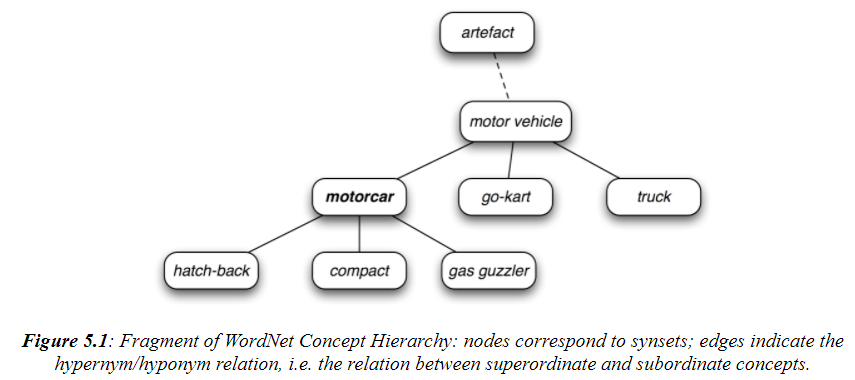

WordNet makes it easy to navigate between concepts. For example, given a concept like motorcar, we can look at the concepts that are more specific; the (immediate) **hyponyms**.

In [28]:
# get the synsets of word
motorcar = wn.synset('car.n.01')

# get the word's hyponyms
types_of_motorcar = motorcar.hyponyms()

# print the first hyponym
print(types_of_motorcar[:10], "\n")

# sorted 
print(sorted(lemma.name() 
             for synset in types_of_motorcar 
             for lemma in synset.lemmas()), end=" ")

[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01')] 

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car

We can also navigate up the hierarchy by visiting **hypernyms**. 

Some words have **multiple paths**, because they can be classified in more than one way.

In [45]:
# get hypernym
print(motorcar.hypernyms(), "\n")

# get hypernym paths
paths = motorcar.hypernym_paths()

# get the number of paths
print("The word 'motorcar' has {} hypernym paths.".format
      (len(paths)), "\n")

# check the 1st path
print([synset.name() for synset in paths[0]], "\n")

# check the 2nd path
print([synset.name() for synset in paths[1]])

[Synset('motor_vehicle.n.01')] 

The word 'motorcar' has 2 hypernym paths. 

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01'] 

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']


We can get the most **general hypernyms** (**root hypernyms**) of a synset.

In [47]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

In [72]:
#nltk.app.wordnet()

<a name="LexicalRelations"></a>
### 2.5.3 More Lexical Relations
`part_meronyms()` <br>
`substance_meronyms()` <br>
`member_holonyms()`

**Hypernyms** and **hyponyms** are called **lexical relations** because they relate one synset to another. These two relations navigate up and down the **"is-a" hierarchy**. 

Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**).

> **word** &rarr; tree <br>
**part meronyms** &rarr; trunk, crown, etc <br>
**substance meronyms** &rarr; heartwood, sapwood, etc <br>
**member holonyms** &rarr; forest (collection of trees)

In [76]:
# get word's synset
synset_tree = wn.synset('tree.n.01')

# get part meronyms
print("The part meronyms of 'tree' are: {}.\n".format(synset_tree.part_meronyms()))

# get substance meronyms
print("The substance meronyms of 'tree' are: {}. \n".format(synset_tree.substance_meronyms()))

# get member holonyms
print("The member holonyms of 'tree' are: {}. \n".format(synset_tree.member_holonyms()))

The part meronyms of 'tree' are: [Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')].

The substance meronyms of 'tree' are: [Synset('heartwood.n.01'), Synset('sapwood.n.01')]. 

The member holonyms of 'tree' are: [Synset('forest.n.01')]. 



To see just **how intricate things can get**, consider the word **mint**, which has **several closely-related senses**. 

We can see that mint.n.04 is part of mint.n.02 and the substance from which mint.n.05 is made.

In [82]:
for synset in wn.synsets("mint", wn.NOUN):
    print(synset.name() + ":", synset.definition())
    
# get part holonyms
print(wn.synset('mint.n.04').part_holonyms(),"\n")

# get substance holonyms
print(wn.synset('mint.n.04').substance_holonyms())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
[Synset('mint.n.02')] 

[Synset('mint.n.05')]


There are also **relationships between verbs**. 

For example, the act of walking involves the act of stepping, so **walking entails stepping**. 

Some verbs have **multiple entailments**.

In [84]:
# get entailments
print(wn.synset('walk.v.01').entailments(), "\n")

# get entailments
print(wn.synset('eat.v.01').entailments(), "\n")

# get entailments
print(wn.synset('tease.v.03').entailments(), "\n")

[Synset('step.v.01')] 

[Synset('chew.v.01'), Synset('swallow.v.01')] 

[Synset('arouse.v.07'), Synset('disappoint.v.01')] 



Some lexical **relationship** hold **between lemmas**, e.g. **antonymy.

In [86]:
# get antonym
print(wn.lemma('supply.n.02.supply').antonyms(), "\n")

print(wn.lemma('horizontal.a.01.horizontal').antonyms())

[Lemma('demand.n.02.demand')] 

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]


We can see the **lexical relations**, and the other methods defined on a synset, using `dir()`.

In [94]:
# get first 10 synset methods
print(dir(wn.synset('harmony.n.02'))[:40])

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth']


<a name="Semantics"></a>
### 2.5.4 Semantic Similarity
**Synsets are linked by a complex network of lexical relations**. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. 

Knowing which words are **semantically related** is **useful for indexing a collection of texts**, so that a search for a general term like vehicle will match documents containing specific terms like limousine.

Recall that **each synset has one or more hypernym paths that link it to a root hypernym** such as entity.n.01. 

**Two synsets linked to the same root may have several hypernyms in common**. 

If **two synsets share a very specific hypernym** — one that is low down in the hypernym hierarchy — they must be **closely related**.

In [99]:
# get synsets
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

# get common hypernyms
print("The lowest common hypernyms between 'right_whale' and 'minke_whale' are: {}.\n".format(
right.lowest_common_hypernyms(minke)))

print("The lowest common hypernyms between 'right_whale' and 'orca' are: {}.\n".format(
right.lowest_common_hypernyms(orca)))

print("The lowest common hypernyms between 'right_whale' and 'tortoise' are: {}.\n".format(
right.lowest_common_hypernyms(tortoise)))

print("The lowest common hypernyms between 'right_whale' and 'novel' are: {}.\n".format(
right.lowest_common_hypernyms(novel)))

The lowest common hypernyms between 'right_whale' and 'minke_whale' are: [Synset('baleen_whale.n.01')].

The lowest common hypernyms between 'right_whale' and 'orca' are: [Synset('whale.n.02')].

The lowest common hypernyms between 'right_whale' and 'tortoise' are: [Synset('vertebrate.n.01')].

The lowest common hypernyms between 'right_whale' and 'novel' are: [Synset('entity.n.01')].



We know that **whale is very specific** (and baleen whale even more so), while **vertebrate is more general** and **entity is completely general**.

We can **quantify** this concept of **generality** by looking up the **depth of each synset**:

In [104]:
# find the depth of each synset
print("The min_depth of 'baleen_whale' is : {}. \n".
      format(wn.synset('baleen_whale.n.01').min_depth()))

print("The min_depth of 'whale' is : {}. \n".
      format(wn.synset('whale.n.02').min_depth()))

print("The min_depth of 'vertebrate' is : {}. \n".
      format(wn.synset('vertebrate.n.01').min_depth()))

print("The min_depth of 'entity' is : {}. \n".
      format(wn.synset('entity.n.01').min_depth()))

The min_depth of 'baleen_whale' is : 14. 

The min_depth of 'whale' is : 13. 

The min_depth of 'vertebrate' is : 8. 

The min_depth of 'entity' is : 0. 



**Similarity measures** have been defined over the collection of WordNet synsets which incorporate the above insight. 

For example, `path_similarity()` assigns a score in the **range 0–1** based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. 

In [107]:
# get similarity score
print("The similarity score between 'right_whale' and 'minke' is: {}. \n".
      format(right.path_similarity(minke)))

print("The similarity score between 'right_whale' and 'orca' is: {:.2f}. \n".
      format(right.path_similarity(orca)))

print("The similarity score between 'right_whale' and 'novel' is: {:.2f}. \n".
      format(right.path_similarity(novel)))

The similarity score between 'right_whale' and 'minke' is: 0.25. 

The similarity score between 'right_whale' and 'orca' is: 0.17. 

The similarity score between 'right_whale' and 'novel' is: 0.04. 



The number decrease as we move away from the semantic space of sea creatures to inanimate objects.

Several other **similarity measures** are available. Find more with `help(wn)`.

NLTK also includes **VerbNet**, a **hierarhical verb lexicon** linked to **WordNet**: `from nltk.corpus import verbnet`.

Significant sources of published corpora are the **Linguistic Data Consortium (LDC)** and the **European Language Resources Agency (ELRA)**. 

A good **tool for creating annotated text corpora** is called [**Brat**](http://brat.nlplab.org/).

These and many other language resources have been documented using **OLAC Metadata**, and can be searched via the OLAC [homepage](http://www.language-archives.org/). 

**Corpora List** is a mailing list for discussions about corpora, and you can find resources by searching the list archives or posting to the list.

The most complete inventory of the world's languages is [**Ethnologue**](http://www.ethnologue.com/). Of 7,000 languages, only a few dozen have substantial digital resources suitable for use in NLP.